## Auto Car Price Prediction Case Study

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

Based on the analysis of the provided dataset company wants to know 

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Since the company is trying to launch into the american market , assessed model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [3]:
## Reading the provided dataset into a pandas dataframe

carprice = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
##checking the shape of the datafile provided
carprice.shape

(205, 26)

In [6]:
##checking the summary stats for the dataframe
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
##checking if there are any null records in any columns
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Data seems to be in better shape as there are no columns with Null values 

In [8]:
##Dropping the car_id column as it is the unique id of the observations , this could be system id and will not be of much use for modelling
carprice.drop('car_ID',axis=1,inplace=True)

In [9]:
##Dropping duplicates from the dataset if any 
carprice=carprice.drop_duplicates()

In [10]:
carprice.shape

(205, 25)

Column car_ID has been dropped and there seems to be no duplicates in the data 

In [11]:
##Creating a function to remove single value unique columns from the dataframe
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    return df_newsingle

In [12]:
##Removing single value unique columns from the dataframe
carprice = remove_single_val_uniq_col(carprice)
carprice.shape

(205, 25)

In [13]:
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
##Deriving CompanyName from carname variable
carprice['CompanyName'] = carprice['CarName'].str.split(' ').str[0].str.lower()

In [15]:
carprice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Looking at the unique values of company names there seems to be data issues in it we will be fixing the same in the next step

In [16]:
carprice['CompanyName'].replace('maxda','mazda',inplace = True)
carprice['CompanyName'].replace('porcshce','porsche',inplace = True)
carprice['CompanyName'].replace('toyouta','toyota',inplace = True)
carprice['CompanyName'].replace('vokswagen','volkswagen',inplace = True)
carprice['CompanyName'].replace('vw','volvo',inplace = True)

Since we have the company name now lets drop the car name as per the information provided 

In [17]:
carprice.drop('CarName',axis=1,inplace=True)

## Data Analysis

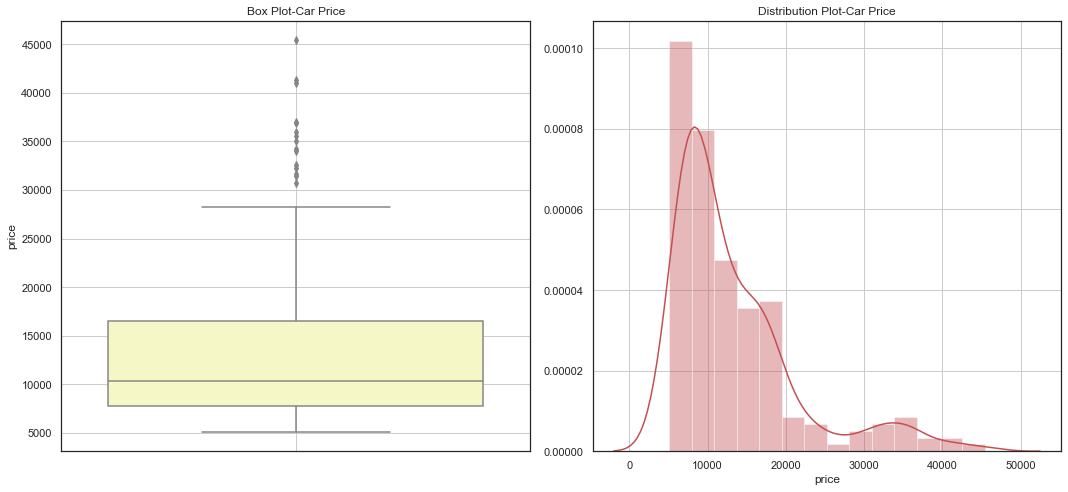

In [18]:
##Lets check the distribution of the target variable

plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = carprice.price , palette='RdYlGn')
plt.title('Box Plot-Car Price')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(carprice.price , hist= True,color="r" )
plt.title('Distribution Plot-Car Price')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
carprice.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [20]:
carprice.price.quantile([.8,.85,.9,.95,.98])

0.80    17493.8
0.85    18500.0
0.90    22563.0
0.95    32472.4
0.98    36809.6
Name: price, dtype: float64

**Observation:** Car Prices are positively skewed with 85% of cars priced below 18500 USD , we will not be imputing these values are there are higher priced luxur cars being sold in american markets and the company may be interested in launching cars in that price segments as well

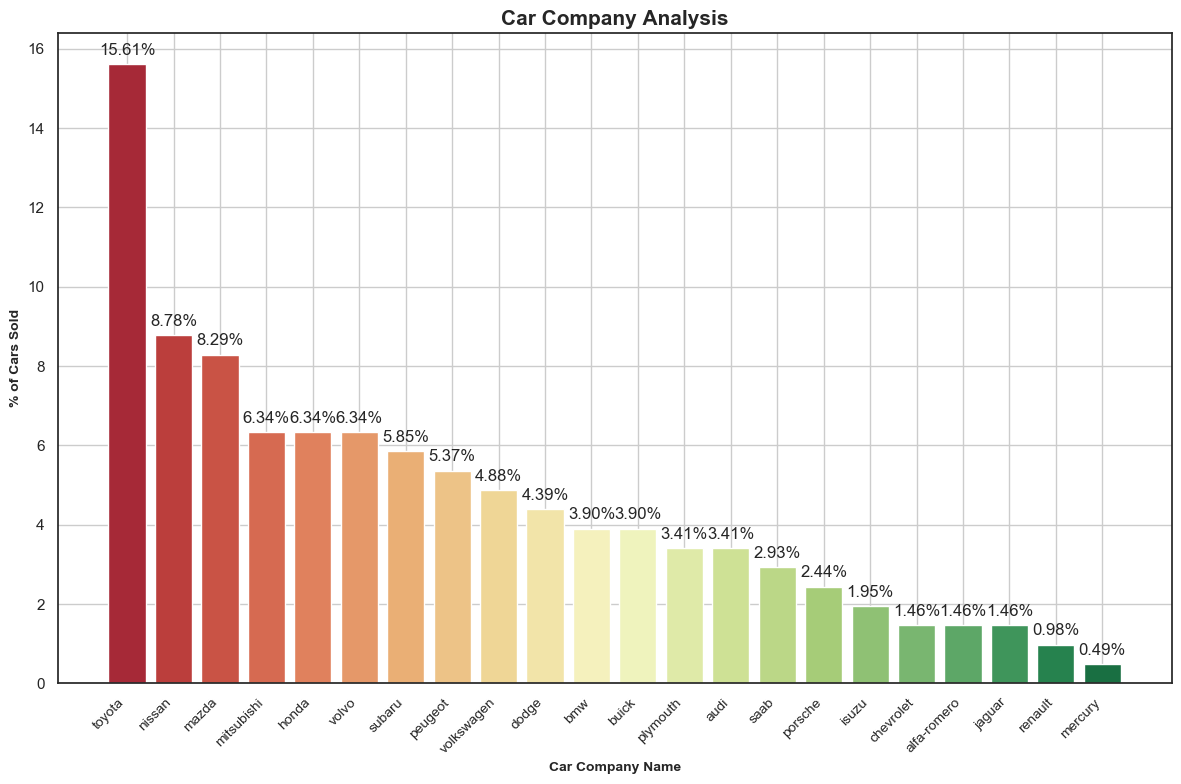

In [21]:
plt.figure(figsize=(12,8),dpi = 100)

br = pd.DataFrame(carprice.CompanyName.value_counts().sort_values(ascending=False)/len(carprice)*100)

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'CompanyName','CompanyName':'app_cnt'} )

br

ax = sns.barplot(x='CompanyName',y='app_cnt', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.CompanyName), fontsize=10)

plt.xlabel('Car Company Name', fontsize= 10, fontweight='bold')
plt.ylabel('% of Cars Sold', fontsize= 10, fontweight='bold')
plt.title('Car Company Analysis', fontsize=15,fontweight='bold')

   

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.
                                                , p.get_height()), ha = 'center'
                , va = 'center', xytext = (0, 10), textcoords = 'offset points' )

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
     
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:** Toyota seems to be preferred brand by American consumers per the dataset provided

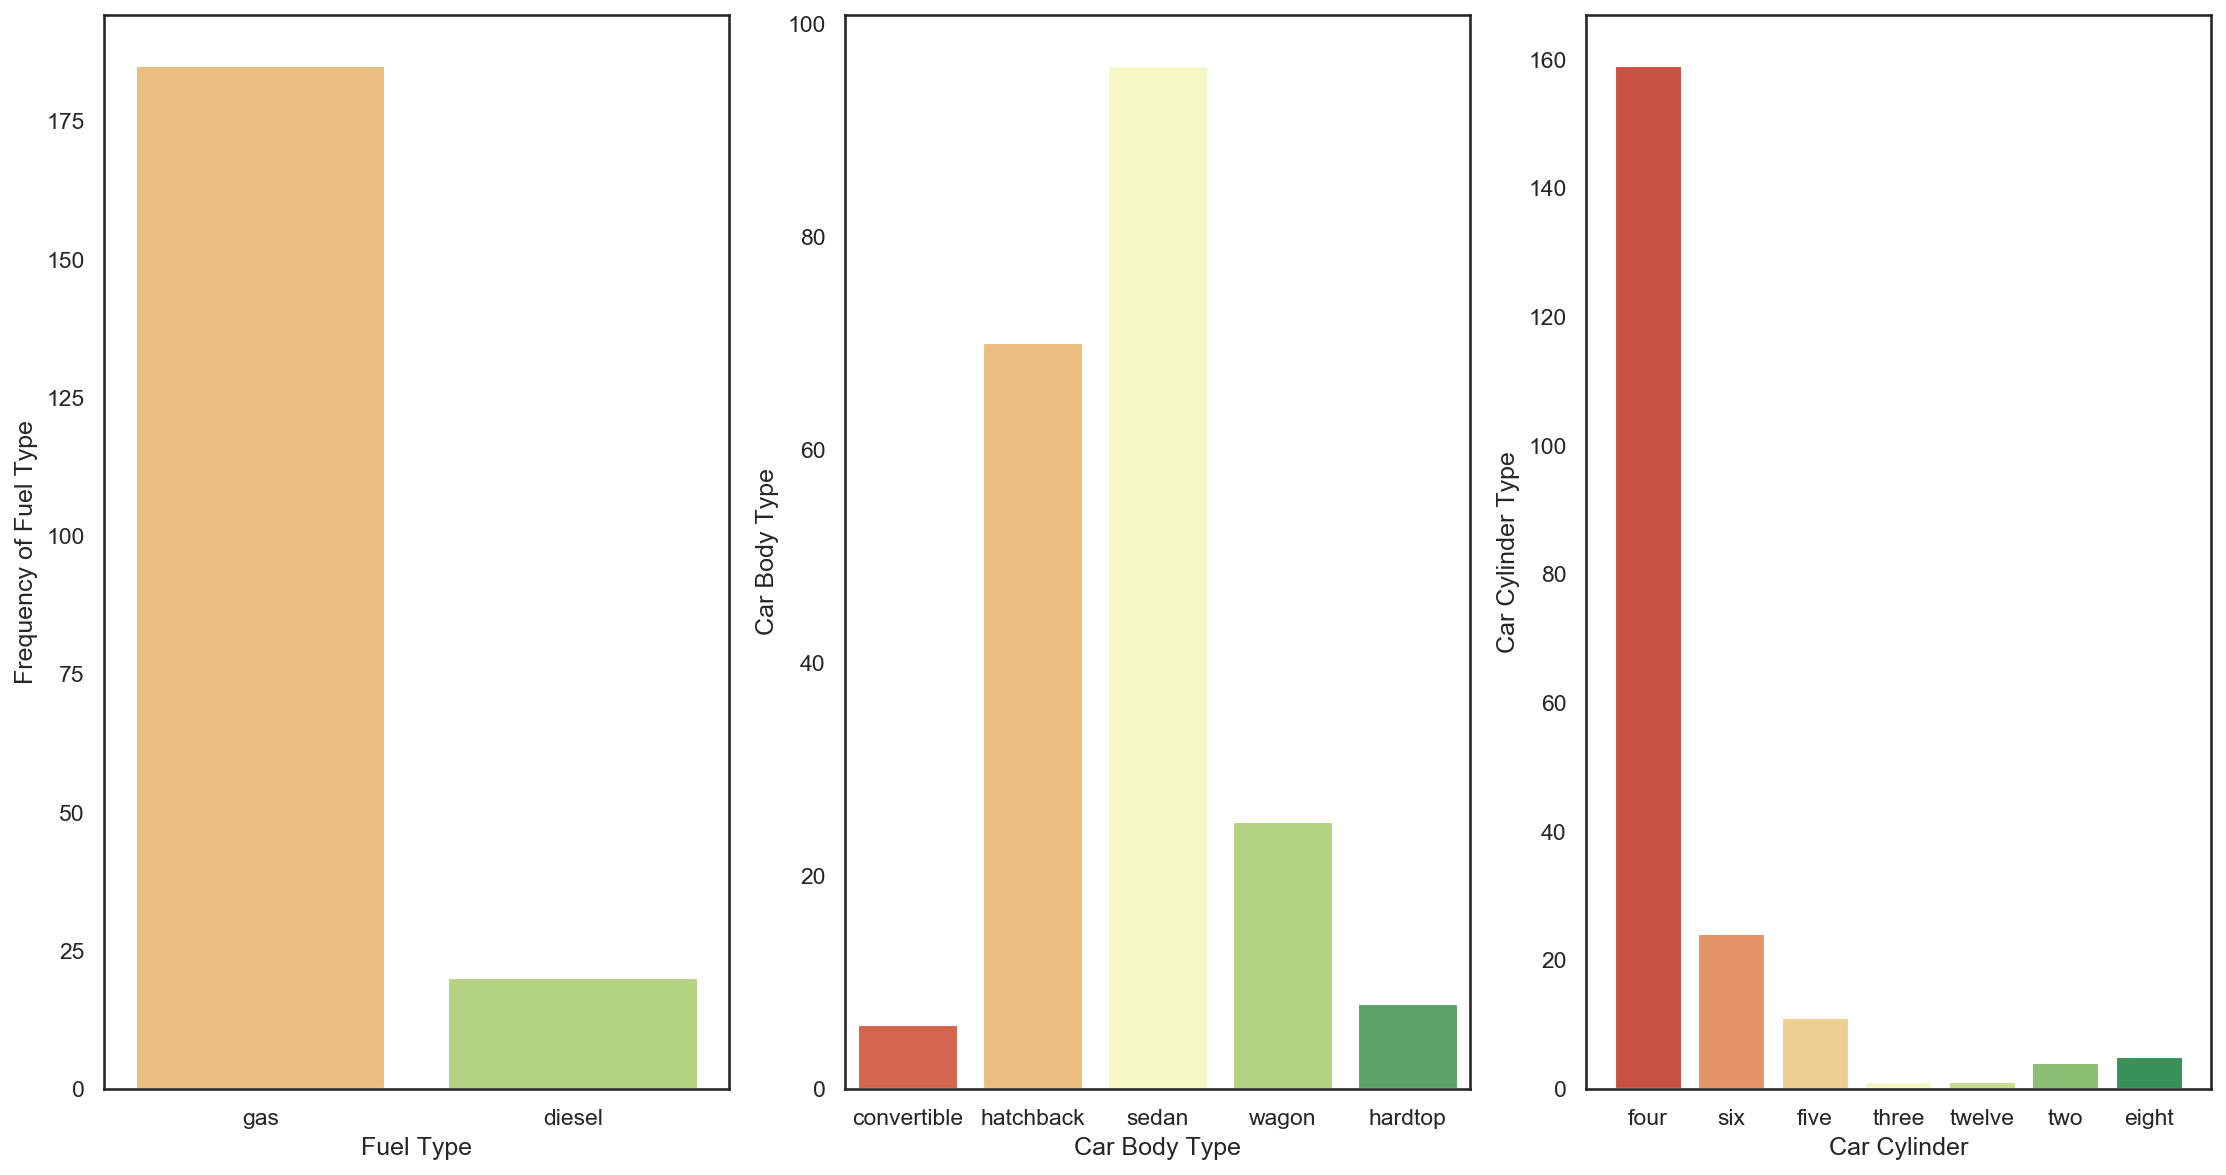

In [22]:
###Univariate analysis on  Fuel Type , Car body ,Car cylinder

plt.figure(figsize=(15,8), dpi = 150)

plt.subplot(1,3,1)
plt1 = sns.countplot(carprice.fueltype , palette=("RdYlGn"))
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

plt.subplot(1,3,2)
plt2 = sns.countplot(carprice.carbody , palette=("RdYlGn"))
plt2.set(xlabel = 'Car Body Type', ylabel='Car Body Type')

plt.subplot(1,3,3)
plt3 = sns.countplot(carprice.cylindernumber , palette=("RdYlGn"))
plt3.set(xlabel = 'Car Cylinder', ylabel='Car Cylinder Type')

plt.tight_layout()
plt.autoscale()
plt.show()


**Observations:** 
- Petrol run cars are preferred over Diesel
- Sedans are Most sold cars in the Market
- Four Cylinder cars are sold the highest 


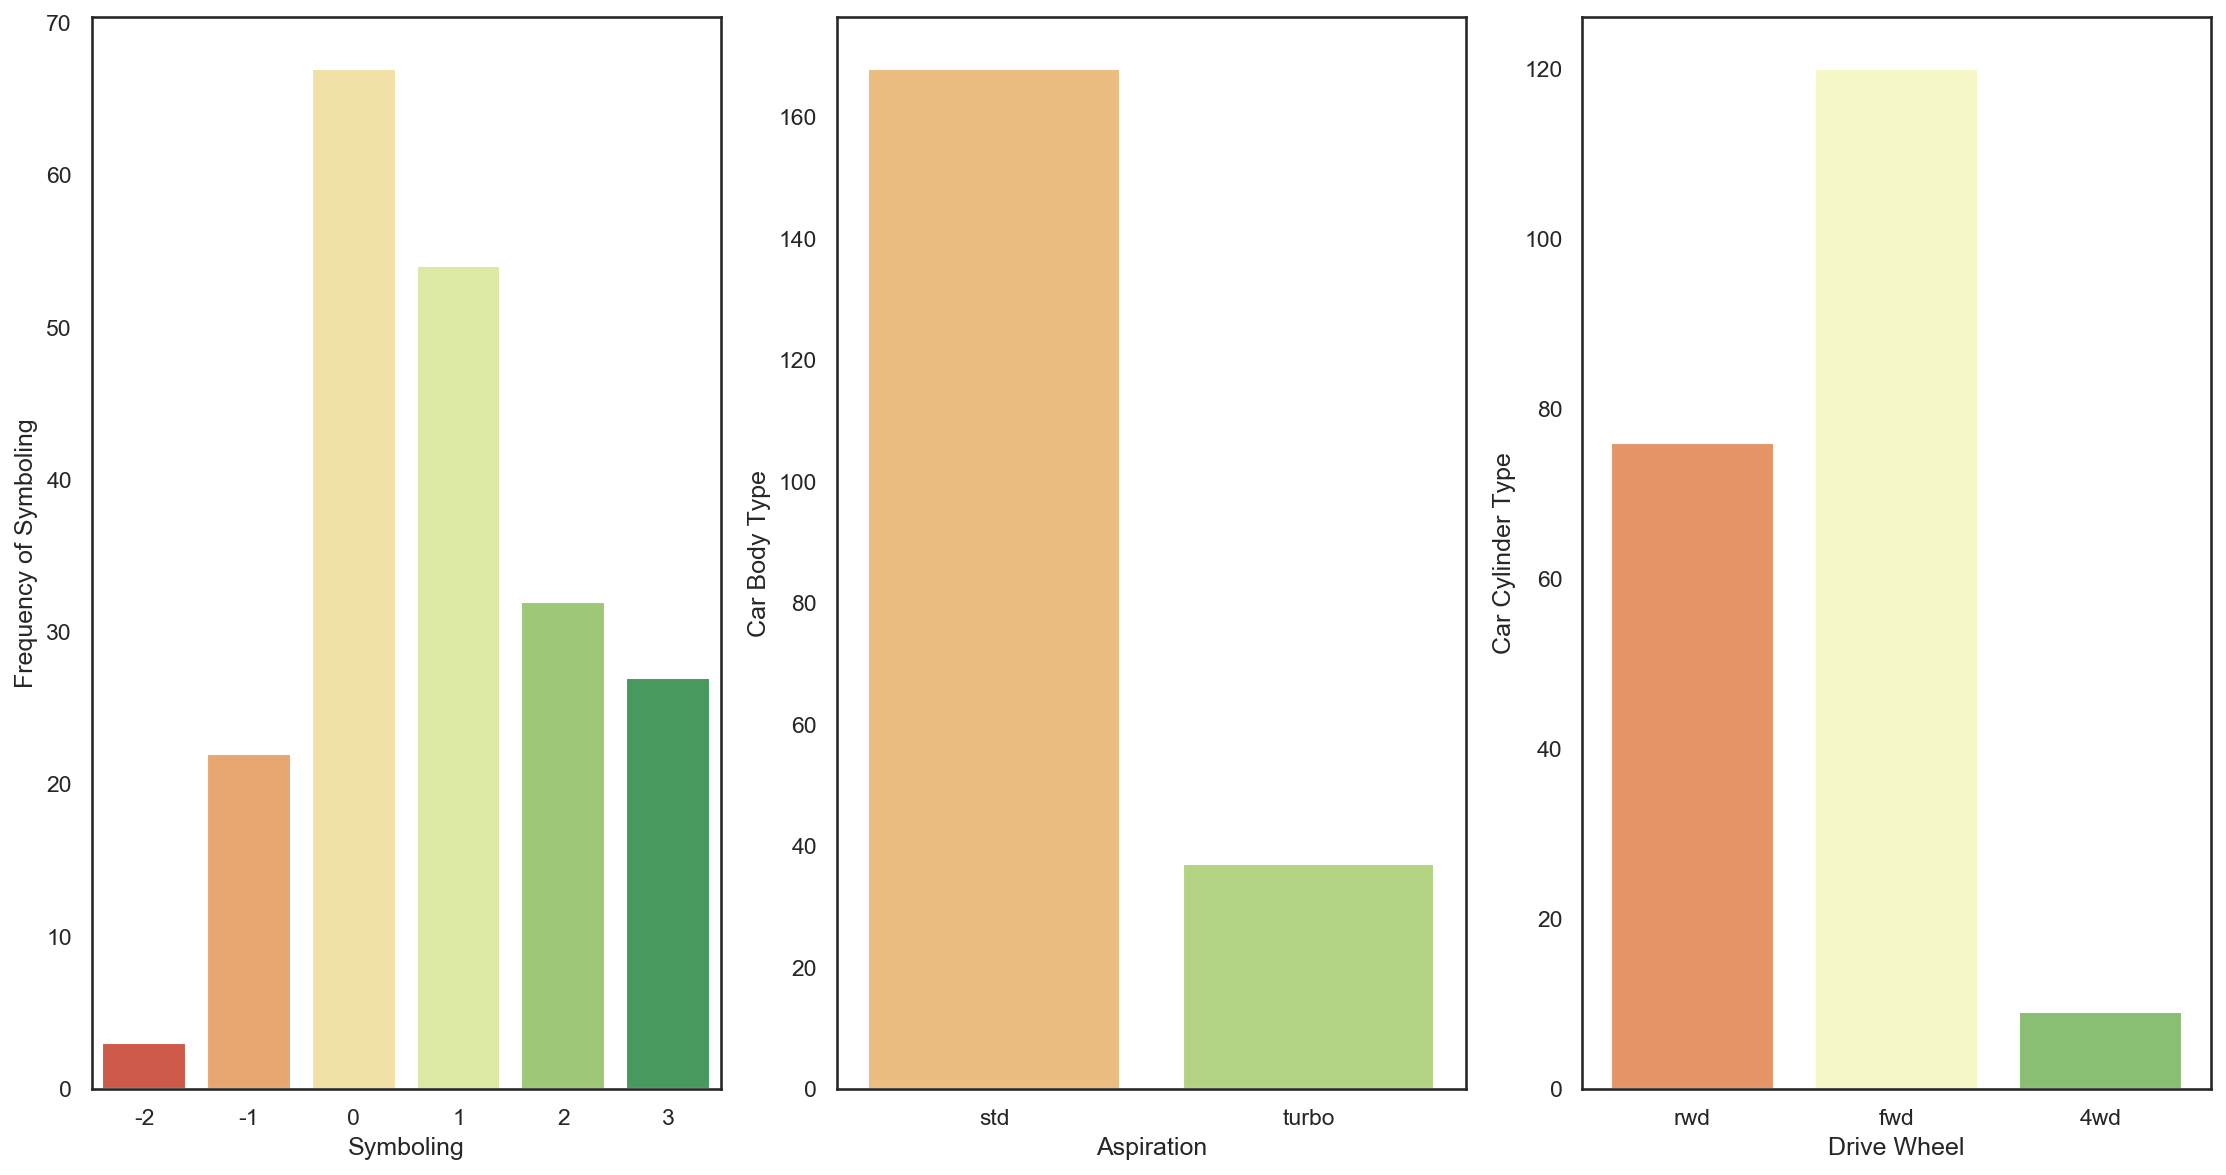

In [23]:
###Univariate analysis on  Fuel Type , Car body ,Car cylinder

plt.figure(figsize=(15,8), dpi = 150)

plt.subplot(1,3,1)
plt1 = sns.countplot(carprice.symboling , palette=("RdYlGn"))
plt1.set(xlabel = 'Symboling', ylabel='Frequency of Symboling')

plt.subplot(1,3,2)
plt2 = sns.countplot(carprice.aspiration , palette=("RdYlGn"))
plt2.set(xlabel = 'Aspiration', ylabel='Car Body Type')

plt.subplot(1,3,3)
plt3 = sns.countplot(carprice.drivewheel , palette=("RdYlGn"))
plt3.set(xlabel = 'Drive Wheel', ylabel='Car Cylinder Type')

plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:** 
- Interestingly cars with a high risk insurance rating are sold the most
- Cars with std aspirations oversell turbo cars
- Cars with fwd drive wheel are sold the most 

In [24]:
carprice.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CompanyName          object
dtype: object

Based on the data Data Dictonary provided we can see that symboling is treated as numeric since the datatype infered is int64 , lets convert it to categorical data

In [25]:
carprice.symboling = carprice.symboling.map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

print(carprice.dtypes)

symboling            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CompanyName          object
dtype: object


**Lets now plot the correlation matrix to see how the predictor variables are correlated to target variable and check if multicollinearlity exists between the predictor variables as well**

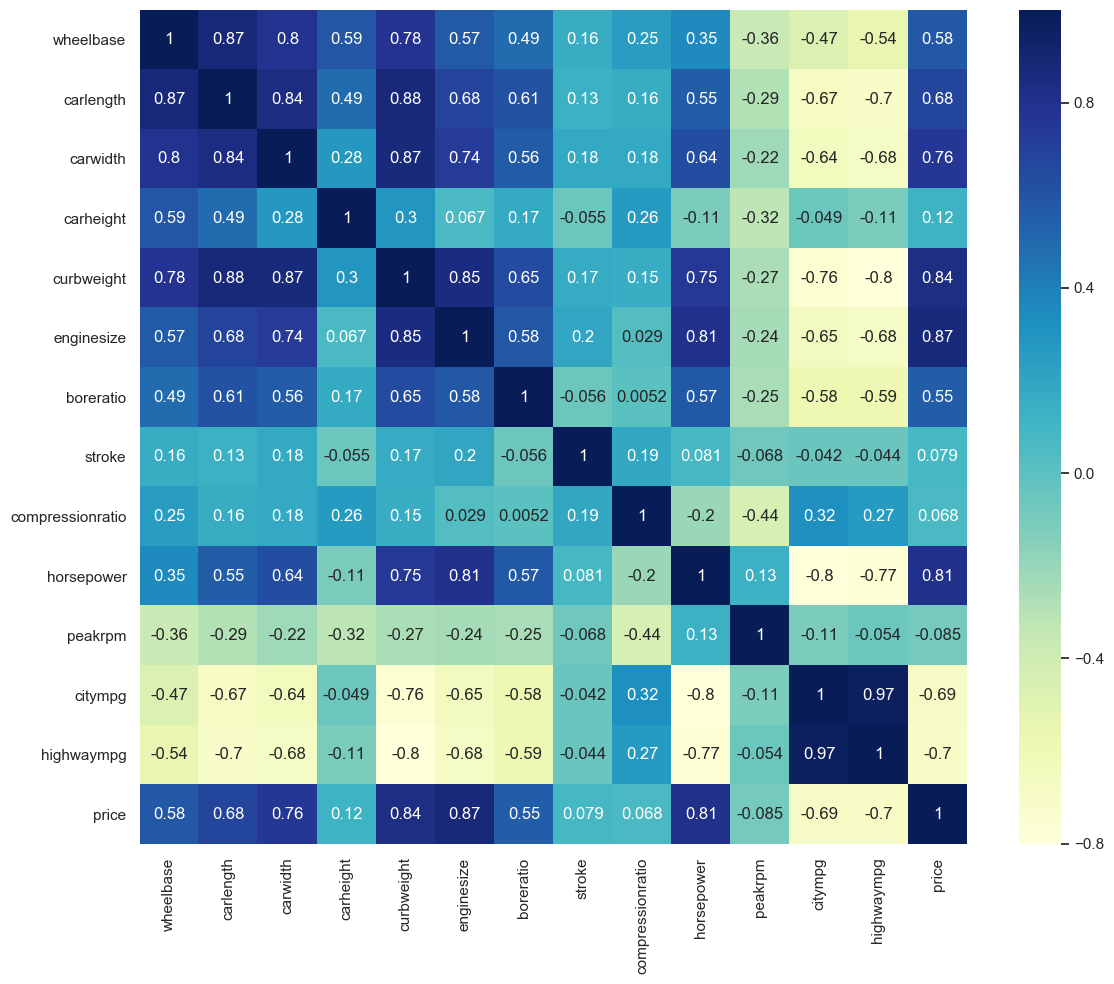

In [26]:
##Correlation heat map

plt.figure(figsize = (12, 10) , dpi = 100)
cor=carprice.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.autoscale()
plt.tight_layout()
plt.show()

**Observations:**
We can draw the following inferences from the above correlation heat map

Target variable Price is highly correlated to the following variables

- Positive Correlations
  - horepower
  - boreratio
  - enginesize
  - curbweight
  - carlenght
  - wheelbase
  
- Negative Correlations
  - citympg
  - highwaympg
  
We can clearly see that the following set of predictor variables are highly correlated   
   - carlength & curbweight ,carwidth , wheelbase
   - curbweigth & horespower ,enginesize,carwidth,carlength,wheelbase
   - higwaympg and citympg are highly correlated with spearmans correlation value at 0.97
   - carlength & highwaympg , citympg (-vely corelated)
   - carwidth & highwaympg , citympg (-vely corelated)
   - curbweigth & highwaympg , citympg (-vely corelated)
   - enginesize & highwaympg , citympg (-vely corelated)
   

In [27]:
##Lets check the impact of categorical variables on target variable Price

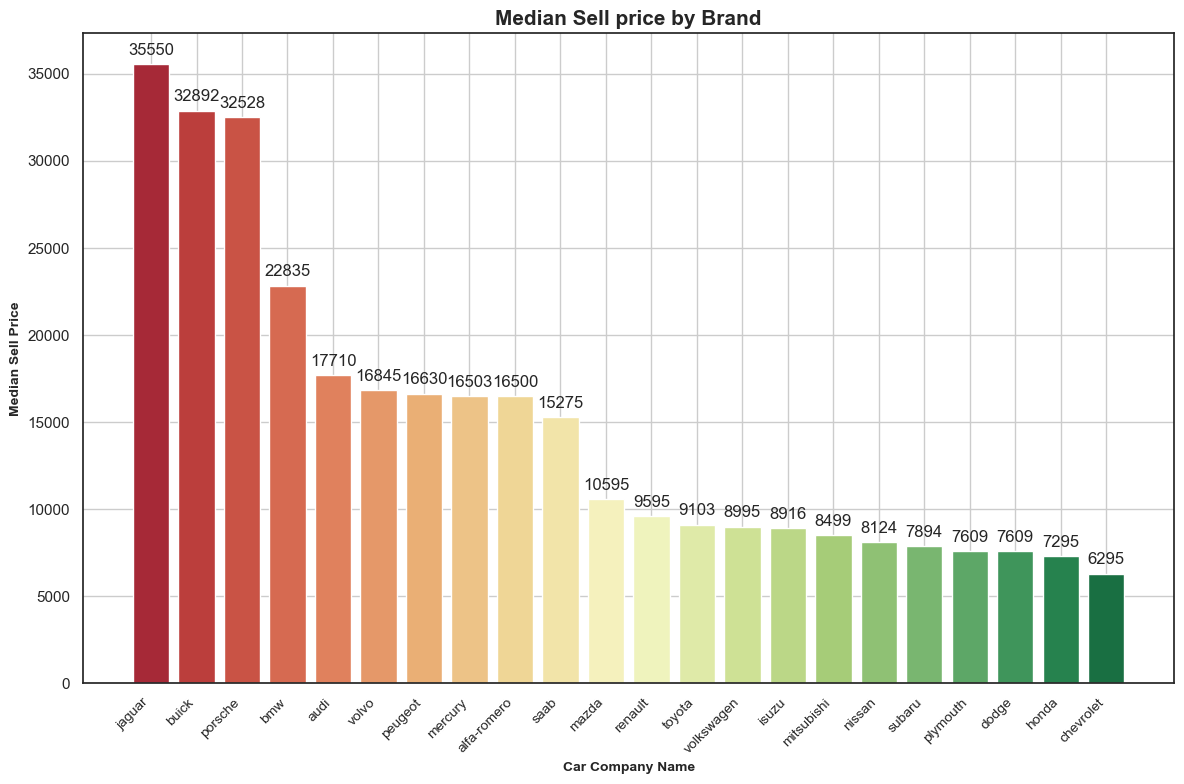

In [28]:
plt.figure(figsize=(12,8),dpi = 100)

br = pd.DataFrame(carprice.groupby(['CompanyName'])['price'].median().sort_values(ascending = False))

br.reset_index(inplace = True)

br = br.rename(columns =  {'price':'Avgprice'} )



ax = sns.barplot(x='CompanyName',y='Avgprice', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.CompanyName), fontsize=10)

plt.xlabel('Car Company Name', fontsize= 10, fontweight='bold')
plt.ylabel('Median Sell Price', fontsize= 10, fontweight='bold')
plt.title('Median Sell price by Brand', fontsize=15,fontweight='bold')

   

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2.
                                                , p.get_height()), ha = 'center'
                , va = 'center', xytext = (0, 10), textcoords = 'offset points' )

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
     
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:** As expected the median car price of the luxury car brands seem to be higher , the median prices of the preferred brand toyota is around 9200 USD

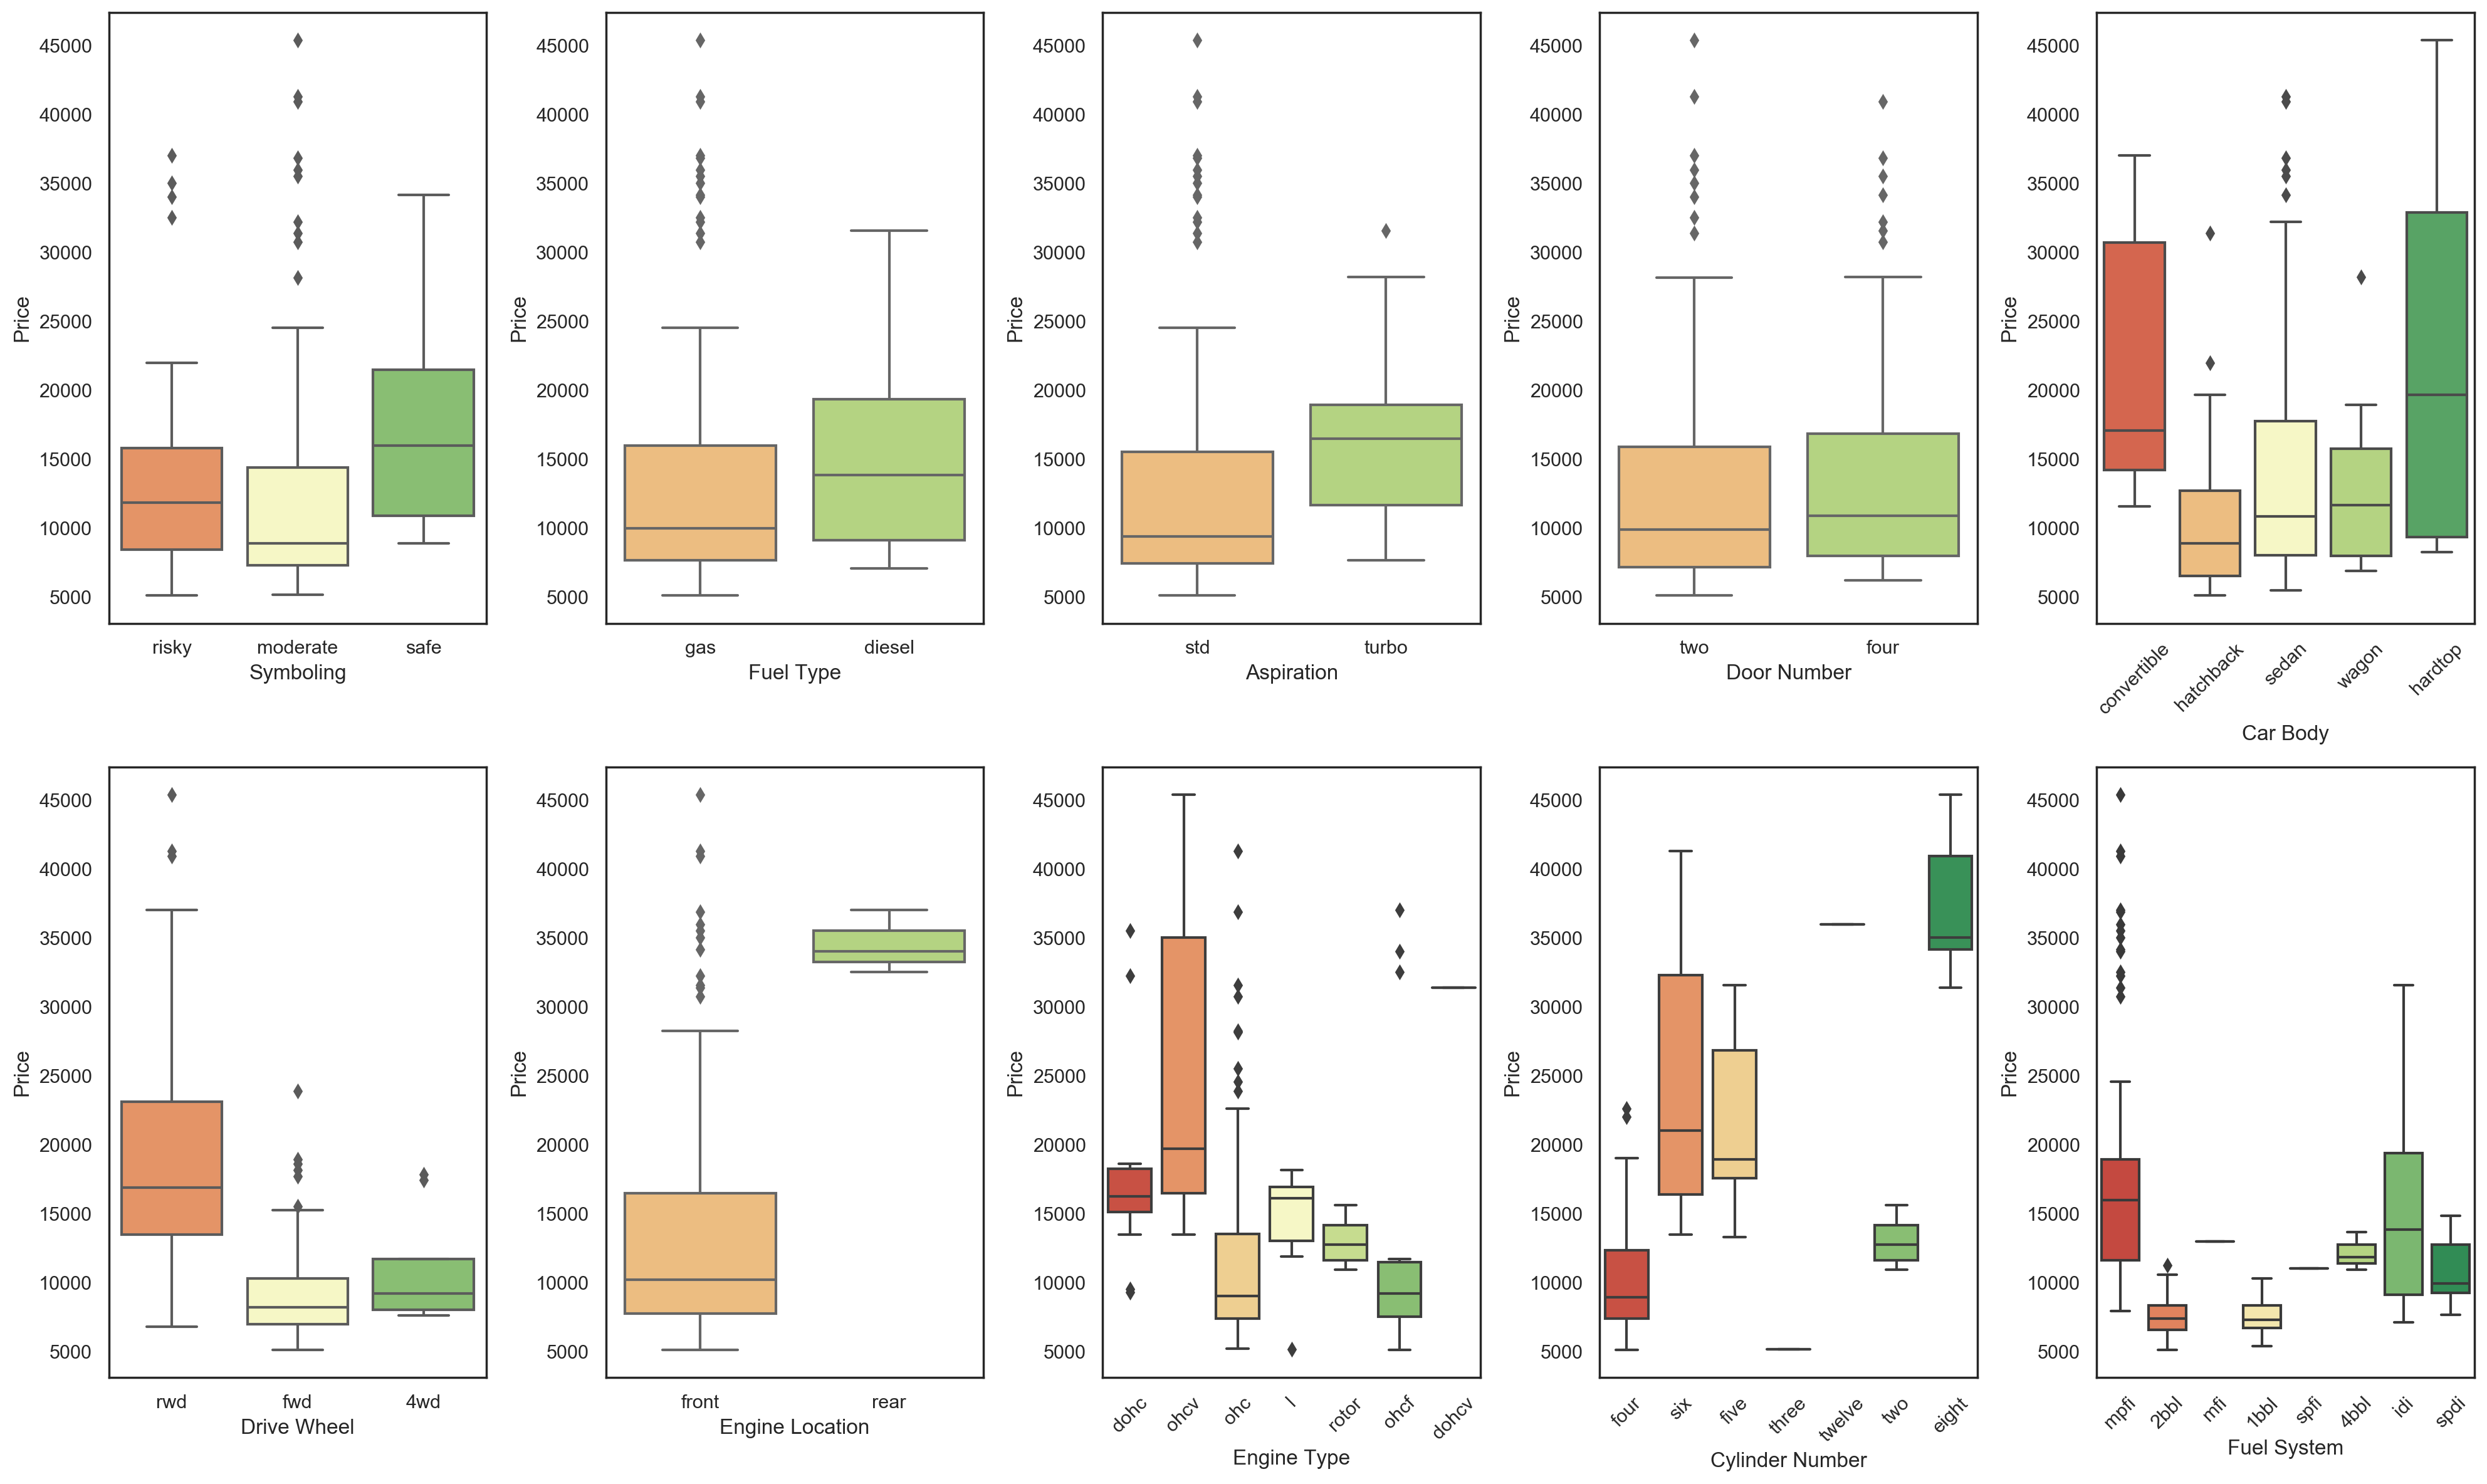

In [29]:
## Lets check the impact of the all the remaining categorical predictors on the Target variable Price

plt.figure(figsize=(20,12),dpi = 200)

plt.subplot(2,5,1)
pltcat1 = sns.boxplot(x= carprice.symboling, y = carprice.price ,palette='RdYlGn')
pltcat1.set(xlabel = 'Symboling', ylabel='Price')

plt.subplot(2,5,2)
pltcat2  = sns.boxplot(x= carprice.fueltype, y = carprice.price,palette='RdYlGn' )
pltcat2.set(xlabel = 'Fuel Type', ylabel='Price')

plt.subplot(2,5,3)
pltcat3  = sns.boxplot(x= carprice.aspiration, y = carprice.price,palette='RdYlGn' )
pltcat3.set(xlabel = 'Aspiration', ylabel='Price')


plt.subplot(2,5,4)
pltcat4  = sns.boxplot(x= carprice.doornumber, y = carprice.price,palette='RdYlGn' )
pltcat4.set(xlabel = 'Door Number', ylabel='Price')


plt.subplot(2,5,5)
pltcat4  = sns.boxplot(x= carprice.carbody, y = carprice.price,palette='RdYlGn' )
plt.xticks(rotation=45)
pltcat4.set(xlabel = 'Car Body', ylabel='Price')

plt.subplot(2,5,6)
pltcat4  = sns.boxplot(x= carprice.drivewheel, y = carprice.price,palette='RdYlGn' )
pltcat4.set(xlabel = 'Drive Wheel', ylabel='Price')


plt.subplot(2,5,7)
pltcat4  = sns.boxplot(x= carprice.enginelocation, y = carprice.price,palette='RdYlGn' )
pltcat4.set(xlabel = 'Engine Location', ylabel='Price')\

plt.subplot(2,5,8)
pltcat4  = sns.boxplot(x= carprice.enginetype, y = carprice.price,palette='RdYlGn' )
plt.xticks(rotation=45)
pltcat4.set(xlabel = 'Engine Type', ylabel='Price')

plt.subplot(2,5,9)
pltcat4  = sns.boxplot(x= carprice.cylindernumber, y = carprice.price ,palette='RdYlGn')
plt.xticks(rotation=45)
pltcat4.set(xlabel = 'Cylinder Number', ylabel='Price')


plt.subplot(2,5,10)
pltcat4  = sns.boxplot(x= carprice.fuelsystem, y = carprice.price ,palette='RdYlGn')
plt.xticks(rotation=45)
pltcat4.set(xlabel = 'Fuel System', ylabel='Price')

plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**

Following categorical variable seem to having an impact on the pricing of the vehicle.
 - Fuel Type
 - Aspiration
 - Carbody , with hardtop cars having the highest median car price
 - Drive Wheel , rear drive wheel cars seems to be having a higher median car price
 - Engine Location
 - Cylinder Number

In [30]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Data Preparation for Modelling

In [31]:
#Lets check the unique values in categorical columns and see if we can map them to numerical values where the number of unique categorical values is two

print("Unique Values of fueltype are:{}".format( carprice.fueltype.unique()))

print("Unique Values of aspiration are:{}".format( carprice.aspiration.unique()))

print("Unique Values of doornumber are:{}".format( carprice.doornumber.unique()))

print("Unique Values of carbody are:{}".format( carprice.carbody.unique()))

print("Unique Values of drivewheel are:{}".format( carprice.drivewheel.unique()))

print("Unique Values of enginelocation are:{}".format( carprice.enginelocation.unique()))

print("Unique Values of enginetype are:{}".format( carprice.enginetype.unique()))

print("Unique Values of cylindernumber are:{}".format( carprice.cylindernumber.unique()))

print("Unique Values of fuelsystem are:{}".format( carprice.fuelsystem.unique()))

print("Unique Values of symboling are:{}".format( carprice.symboling.unique()))

print("Unique Values of CompanyName are:{}".format( carprice.CompanyName.unique()))


Unique Values of fueltype are:['gas' 'diesel']
Unique Values of aspiration are:['std' 'turbo']
Unique Values of doornumber are:['two' 'four']
Unique Values of carbody are:['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique Values of drivewheel are:['rwd' 'fwd' '4wd']
Unique Values of enginelocation are:['front' 'rear']
Unique Values of enginetype are:['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique Values of cylindernumber are:['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique Values of fuelsystem are:['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Unique Values of symboling are:['risky' 'moderate' 'safe']
Unique Values of CompanyName are:['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Based on the above output lets map the following categorical variable values to binary encoding 1 & 0 

- fueltype 
- aspiration
- doornumber
- enginelocation

In [32]:
carprice.fueltype = carprice.fueltype.map({'gas': 0,'diesel':1})
carprice.aspiration = carprice.aspiration.map({'std': 0,'turbo':1})
carprice.doornumber = carprice.doornumber.map({'two': 0,'four':1})
carprice.enginelocation = carprice.enginelocation.map({'front': 0,'rear':1})

In [33]:
##Lets check if the above transforamtion worked as expected
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,risky,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [34]:
##lets create dummy variables for the rest of the categorical variables 

carbody_dummy = pd.get_dummies(carprice.carbody,drop_first = True)

drivewheel_dummy = pd.get_dummies(carprice.drivewheel,drop_first = True)

enginetype_dummy = pd.get_dummies(carprice.enginetype,drop_first = True)

cylindernumber_dummy = pd.get_dummies(carprice.cylindernumber,drop_first = True)

fuelsystem_dummy = pd.get_dummies(carprice.fuelsystem ,drop_first = True)

symboling_dummy = pd.get_dummies(carprice.symboling ,drop_first = True)

In [35]:
carprice = pd.concat([carprice,carbody_dummy,drivewheel_dummy,enginetype_dummy,cylindernumber_dummy,fuelsystem_dummy,symboling_dummy],axis =1)

In [36]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
0,risky,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,risky,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,moderate,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,risky,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,risky,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
###Dropping variables for which we have dummy variables created 
carprice.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','symboling'],axis = 1 , inplace = True)

carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [38]:
carprice.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'CompanyName', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'risky', 'safe'],
      dtype='object')

In [39]:
carprice.groupby(['CompanyName'])['price'].median().sort_values()

CompanyName
chevrolet       6295.0
honda           7295.0
dodge           7609.0
plymouth        7609.0
subaru          7894.0
nissan          8124.0
mitsubishi      8499.0
isuzu           8916.5
volkswagen      8995.0
toyota          9103.0
renault         9595.0
mazda          10595.0
saab           15275.0
alfa-romero    16500.0
mercury        16503.0
peugeot        16630.0
volvo          16845.0
audi           17710.0
bmw            22835.0
porsche        32528.0
buick          32892.0
jaguar         35550.0
Name: price, dtype: float64

In [40]:
carprice.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Based on the the median carprice and distribution of the lets categorze the cars sold in the american market into three types 
- Affordable segment
- Midtier Segment
- Luxury Segment

This is done so as to avoid creatng 21 dummy varibales as there are 22 distinct levels in Company Name variable

In [41]:
companyynamemapping = {'chevrolet' : 'affordable'
,'honda' : 'affordable'
,'dodge' : 'affordable'
,'plymouth' : 'affordable'
,'subaru' : 'affordable'
,'nissan' : 'affordable'
,'mitsubishi' : 'affordable'
,'isuzu' : 'affordable'
,'volkswagen' : 'affordable'
,'toyota' : 'affordable'
,'renault' : 'affordable'
,'mazda' : 'midtier'
,'saab' : 'midtier'
,'alfa-romero' : 'midtier'
,'mercury' : 'midtier'
,'peugeot' : 'midtier'
,'volvo' : 'midtier'
,'audi' : 'midtier'
,'bmw' : 'luxury'
,'porsche' : 'luxury'
,'buick' : 'luxury'
,'jaguar' : 'luxury'}

carprice['carsegment'] = carprice['CompanyName'].map(companyynamemapping)

In [42]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,risky,safe,carsegment
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,midtier
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,midtier
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,midtier
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,midtier
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,midtier


In [43]:
carsegment_dummy = pd.get_dummies(carprice.carsegment,drop_first = True)

In [44]:
carprice = pd.concat([carprice,carsegment_dummy],axis =1)

In [45]:
##since we have created dummy variables for carsegment thus encoding carname lets drop both the variables 

carprice.drop(['carsegment','CompanyName'],axis = 1 , inplace = True)

Based on the correlation heatmap we have seen that there are predictiors that are highly correlated to each other so based on the same analysis we will be dropping the following variables.

- carwidth
- curbweight
- wheelbase
- highwaympg


In [46]:
carprice.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)

<b>- Splitting the avilable data into training and testing set </b>

In [47]:
np.random.seed(0)
carprice_train, carprice_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

<b>- Rescaling the Features </b>

In [48]:
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['carlength', 'carheight', 'enginesize', 'boreratio', 'stroke','compressionratio' , 'horsepower','peakrpm','citympg','price']

carprice_train[num_vars] = scaler.fit_transform(carprice_train[num_vars])

In [50]:
carpricey_train = carprice_train.pop('price')
carpriceX_train = carprice_train

## Feature Selection using RFE

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(carpriceX_train, carpricey_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(carpriceX_train, carpricey_train)

In [53]:
list(zip(carpriceX_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 11),
 ('aspiration', False, 7),
 ('doornumber', False, 19),
 ('enginelocation', False, 15),
 ('carlength', True, 1),
 ('carheight', False, 25),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('citympg', False, 10),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 17),
 ('rwd', False, 18),
 ('dohcv', False, 9),
 ('l', False, 3),
 ('ohc', False, 2),
 ('ohcf', False, 4),
 ('ohcv', False, 14),
 ('rotor', True, 1),
 ('five', False, 16),
 ('four', False, 8),
 ('six', False, 24),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 26),
 ('4bbl', False, 20),
 ('idi', False, 12),
 ('mfi', False, 28),
 ('mpfi', False, 21),
 ('spdi', False, 6),
 ('spfi', False, 27),
 ('risky', False, 23),
 ('safe', False, 22),
 ('luxury', True, 1),
 ('midtier', False, 13)]

In [54]:
col = carpriceX_train.columns[rfe.support_]
col

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rotor',
       'three', 'twelve', 'two', 'luxury'],
      dtype='object')

In [55]:
carpriceX_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carheight',
       'peakrpm', 'citympg', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'five', 'four', 'six', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'risky', 'safe', 'midtier'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [56]:
# Creating X_test dataframe with RFE selected variables
carprice_X_train_rfe = carpriceX_train[col]

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
carprice_X_train_rfe = sm.add_constant(carprice_X_train_rfe)

<b>- Model 1</b>

In [58]:
lm1 = sm.OLS(carpricey_train,carprice_X_train_rfe).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.59e-65
Time:                        21:17:42   Log-Likelihood:                 202.42
No. Observations:                 143   AIC:                            -374.8
Df Residuals:                     128   BIC:                            -330.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0367      0.038  

Based on the P-value hardtop variable seem to be insignificant , lets drop the same and retrain the model

<b>- Model 2</b>

In [60]:
carprice_X_train_new = carprice_X_train_rfe.drop('hardtop',axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm2 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.24e-65
Time:                        21:17:42   Log-Likelihood:                 201.57
No. Observations:                 143   AIC:                            -375.1
Df Residuals:                     129   BIC:                            -333.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0148      0.034  

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,rotor,inf
13,two,inf
0,const,42.44
2,enginesize,10.75
8,sedan,6.97
7,hatchback,6.00
6,horsepower,4.66
1,carlength,4.32
9,wagon,4.15
3,boreratio,2.23


Based on the above VIF values it seems that the there exists a perfect correlation value between features rotor and two , we will be dropping the varaible two and retraining the model

<b>- Model 3</b>

In [62]:
carprice_X_train_new = carprice_X_train_new.drop('two',axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm3 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.24e-65
Time:                        21:17:42   Log-Likelihood:                 201.57
No. Observations:                 143   AIC:                            -375.1
Df Residuals:                     129   BIC:                            -333.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0148      0.034  

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.44
2,enginesize,10.75
8,sedan,6.97
7,hatchback,6.00
6,horsepower,4.66
1,carlength,4.32
9,wagon,4.15
3,boreratio,2.23
13,luxury,2.21
12,twelve,1.71


Lets drop feature enginesize and retrain the model as the VIF value is high for the same 

<b>- Model 4</b>

In [64]:
carprice_X_train_new = carprice_X_train_new.drop('enginesize' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm4 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.04e-64
Time:                        21:17:42   Log-Likelihood:                 196.49
No. Observations:                 143   AIC:                            -367.0
Df Residuals:                     130   BIC:                            -328.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0079      0.035  

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.26
7,sedan,6.50
6,hatchback,5.71
8,wagon,3.83
1,carlength,3.40
5,horsepower,2.96
2,boreratio,2.17
12,luxury,1.59
3,stroke,1.42
4,compressionratio,1.33


Lets drop feature stroke due to high p-value and retrain the model 

<b>- Model 5</b>

In [66]:
carprice_X_train_new = carprice_X_train_new.drop('stroke' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm5 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.59e-65
Time:                        21:17:42   Log-Likelihood:                 195.83
No. Observations:                 143   AIC:                            -367.7
Df Residuals:                     131   BIC:                            -332.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0117      0.030  

In [67]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.03
6,sedan,6.49
5,hatchback,5.62
7,wagon,3.82
1,carlength,3.16
4,horsepower,2.89
2,boreratio,1.83
11,luxury,1.59
3,compressionratio,1.26
10,twelve,1.20


Lets drop feature twelve and retrain the model as the p-value is high for the same 

<b>- Model 6</b>

In [68]:
carprice_X_train_new = carprice_X_train_new.drop('twelve' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm6 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     145.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.86e-66
Time:                        21:17:42   Log-Likelihood:                 194.95
No. Observations:                 143   AIC:                            -367.9
Df Residuals:                     132   BIC:                            -335.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0098      0.030  

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.95
6,sedan,6.41
5,hatchback,5.61
7,wagon,3.78
1,carlength,3.09
4,horsepower,2.55
2,boreratio,1.82
10,luxury,1.59
3,compressionratio,1.24
8,rotor,1.07


Lets drop feature rotor and retrain the model as the p-value is high for the same 

<b>- Model 7</b>

In [70]:
carprice_X_train_new = carprice_X_train_new.drop('rotor' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm7 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.99e-67
Time:                        21:17:42   Log-Likelihood:                 193.41
No. Observations:                 143   AIC:                            -366.8
Df Residuals:                     133   BIC:                            -337.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0122      0.030  

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.88
6,sedan,6.41
5,hatchback,5.54
7,wagon,3.78
1,carlength,3.09
4,horsepower,2.55
2,boreratio,1.81
9,luxury,1.58
3,compressionratio,1.24
8,three,1.06


Lets drop feature sedan and retrain the model as the vif is high for the same 

<b>- Model 8</b>

In [72]:
carprice_X_train_new = carprice_X_train_new.drop('sedan' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm8 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.50e-65
Time:                        21:17:42   Log-Likelihood:                 186.18
No. Observations:                 143   AIC:                            -354.4
Df Residuals:                     134   BIC:                            -327.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0939      0.022  

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.88
1,carlength,2.77
4,horsepower,2.47
2,boreratio,1.76
8,luxury,1.58
5,hatchback,1.47
3,compressionratio,1.24
6,wagon,1.15
7,three,1.06


Lets drop feature hatchback and retrain the model as the p-value is high for the same 

<b>- Model 9</b>

In [74]:
carprice_X_train_new = carprice_X_train_new.drop('hatchback' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm9 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     184.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.04e-66
Time:                        21:17:42   Log-Likelihood:                 185.41
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     135   BIC:                            -331.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1087      0.018  

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.20
1,carlength,2.30
4,horsepower,2.26
2,boreratio,1.76
7,luxury,1.54
3,compressionratio,1.24
5,wagon,1.11
6,three,1.06


Lets drop feature three and retrain the model as the p-value is high for the same 

<b>- Model 10</b>

In [76]:
carprice_X_train_new = carprice_X_train_new.drop('three' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm10 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     212.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.61e-66
Time:                        21:17:43   Log-Likelihood:                 184.22
No. Observations:                 143   AIC:                            -354.4
Df Residuals:                     136   BIC:                            -333.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1027      0.018  

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.71
4,horsepower,2.26
1,carlength,2.23
2,boreratio,1.76
6,luxury,1.54
3,compressionratio,1.23
5,wagon,1.11


Lets drop feature boreratio and retrain the model as the p-value is high for the same 

<b>- Model 11</b>

In [78]:
carprice_X_train_new = carprice_X_train_new.drop('boreratio' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm11 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.26e-67
Time:                        21:17:43   Log-Likelihood:                 182.94
No. Observations:                 143   AIC:                            -353.9
Df Residuals:                     137   BIC:                            -336.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1130      0.017  

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.38
3,horsepower,2.16
1,carlength,1.88
5,luxury,1.53
2,compressionratio,1.23
4,wagon,1.11


Lets drop feature wagon and retrain the model as the p-value is high for the same 

<b>- Model 12</b>

In [80]:
carprice_X_train_new = carprice_X_train_new.drop('wagon' ,axis =1)
carprice_X_train_new = sm.add_constant(carprice_X_train_new)
lm12 = sm.OLS(carpricey_train,carprice_X_train_new).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     309.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.74e-68
Time:                        21:17:43   Log-Likelihood:                 181.37
No. Observations:                 143   AIC:                            -352.7
Df Residuals:                     138   BIC:                            -337.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1113      0.017  

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = carprice_X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.35
3,horsepower,2.09
1,carlength,1.70
4,luxury,1.52
2,compressionratio,1.22


Lets finalize this model as the remaining features are statistically important as per the p-value and vif

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
carpricey_train_price = lm12.predict(carprice_X_train_new)

In [83]:
print("Mean Sqaure Error for test:")
print(round(mean_squared_error(carpricey_train, carpricey_train_price),4))

Mean Sqaure Error for test:
0.0046


In [84]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

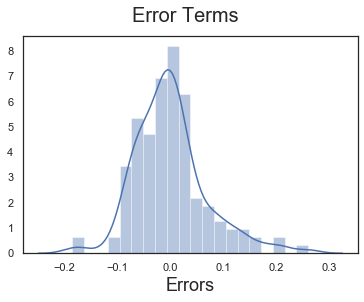

In [85]:
##Checking the distribution of the error terms

fig = plt.figure()
sns.distplot((carpricey_train - carpricey_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Based on the above plot error terms are Normally distributed which fullfils one of the assumptions of Multiple linear regression

## Making Predictions on Test Data

#### Applying the scaling on the test sets

In [86]:
num_vars_test = ['carlength', 'carheight', 'enginesize', 'boreratio', 'stroke','compressionratio' , 'horsepower','peakrpm','citympg','price']

carprice_test[num_vars_test] = scaler.transform(carprice_test[num_vars_test])

#### Dividing into X_test and y_test

In [87]:
y_test = carprice_test.pop('price')
X_test = carprice_test

In [88]:
carprice_X_train_new = carprice_X_train_new.drop(['const'], axis=1)

In [89]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[carprice_X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [90]:
# Making predictions
y_test_pred = lm12.predict(X_test_new)

## Lets find the r2 score using sklear.metrics module

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8772717934991652

In [92]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-Square for test:")
print(round(r2_score(y_test, y_test_pred),4))

R-Square for test:
0.8773


In [93]:
print("Mean Sqaure Error for test:")
print(round(mean_squared_error(y_test, y_test_pred),4))

Mean Sqaure Error for test:
0.0066


Text(0, 0.5, 'y_pred')

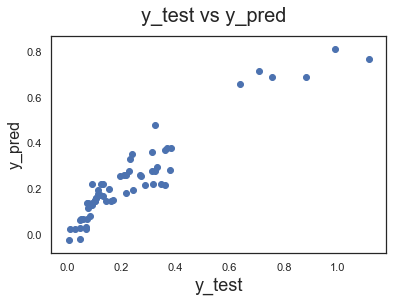

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     